1. Data Cleaning
2. Feature Engineering
3. One Hot Encoding
4. Outlier Detection
5. Dimensionality Reduction

1. Language - Python
2. Data Cleaning - Pandas
3. Data Visualisation - Matplotlib
4. Model Building - Sklearn
5. background - Python Flask
6. HTML, CSS, JS

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

#### 1. Data Cleaning

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby('area_type').agg('count')

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [5]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
new_df = df.drop(['area_type','society','balcony','availability'],axis='columns')

In [7]:
new_df.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
new_df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
new_df = new_df.dropna()

In [10]:
new_df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
new_df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
new_df['bhk']=new_df['size'].apply(lambda x: x.split(' '))

In [13]:
new_df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,"[2, BHK]"
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,"[4, Bedroom]"
2,Uttarahalli,3 BHK,1440,2.0,62.00,"[3, BHK]"
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,"[3, BHK]"
4,Kothanur,2 BHK,1200,2.0,51.00,"[2, BHK]"


In [14]:
new_df['bhk']=new_df['size'].apply(lambda x: int(x.split(' ')[0]))

In [15]:
new_df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
new_df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
new_df[new_df.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [18]:
new_df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [20]:
new_df[new_df['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [21]:
new_df[~new_df['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [22]:
def sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
       return None

In [23]:
sqft_to_num('1000-1100')

1050.0

In [24]:
print(sqft_to_num('34 sq mt'))

None


In [25]:
new_dff=new_df.copy()

In [26]:
new_dff['total_sqft']=new_dff['total_sqft'].apply(sqft_to_num)

In [27]:
new_dff.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [28]:
new_dff.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

### 2. Feature Engineering

In [29]:
df = new_dff.copy()

In [30]:
df['price_sq'] = df['price']*100000/df['total_sqft']

In [31]:
df.head(5)

,location,size,total_sqft,bath,price,bhk,price_sq
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [32]:
len(df.location.unique())

1304

In [33]:
df.location = df.location.apply(lambda x: x.strip())
#removes extra spaces from the location names, making data more clean

In [34]:
location_stats = df['location'].value_counts(ascending=False)
location_stats

location
Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: count, Length: 1293, dtype: int64

In [35]:
location_stats = df.groupby('location')['location'].agg('count')
print(location_stats.to_string())

location
1 Annasandrapalya                                       1
1 Giri Nagar                                            1
1 Immadihalli                                           1
1 Ramamurthy Nagar                                      1
12th cross srinivas nagar banshankari 3rd stage         1
1A Block Koramangala                                    1
1Channasandra                                           1
1Hanuman Nagar                                          1
1Hoysalanagar                                           1
1Kasavanhalli                                           1
1st Block BEL Layout                                    2
1st Block HBR Layout                                    3
1st Block HRBR Layout                                   8
1st Block Jayanagar                                    14
1st Block Koramangala                                  10
1st Phase JP Nagar                                     25
1st Stage Domlur                                        1
1st S

In [36]:
location_stats.values.sum()

13246

In [37]:
len(location_stats[location_stats>10])

241

In [38]:
len(location_stats)

1293

In [39]:
len(location_stats[location_stats<=10])

1052

Dimensionality Reduction

In [40]:
location_stats_less_than_10 = location_stats[location_stats<=10] #e1
location_stats_less_than_10 

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1052, dtype: int64

In [41]:
len(df.location.unique())

1293

In [42]:
df.location=df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)


In [43]:
len(df.location.unique())

242

In [44]:
df.head(10)

,location,size,total_sqft,bath,price,bhk,price_sq
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


Outlier Detection and Removal

Points which are data error or present extreme variations

In [45]:
df[df.total_sqft/df.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_sq
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [46]:
df[df.total_sqft/df.bhk<300].count()

location      744
size          744
total_sqft    744
bath          744
price         744
bhk           744
price_sq      744
dtype: int64

In [47]:
df.shape

(13246, 7)

In [48]:
df_new = df[~(df.total_sqft/df.bhk<300)] #e2
df_new.shape

(12502, 7)

In [49]:
df_new.price_sq.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_sq, dtype: float64

we can remove extreme cases based on standard devaition

In [50]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_sq)
        st = np.std(subdf.price_sq)
        reduced_df = subdf[(subdf.price_sq>(m-st)) & (subdf.price_sq<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df_out=pd.DataFrame(): This line initializes an empty DataFrame called df_out.

for key, subdf in df.groupby('location'):: This line iterates over the unique values in the 'location' column of the input DataFrame df and creates a subset DataFrame subdf for each unique location. The key variable stores the current unique location value.

m=np.mean(subdf.price_sq): This line calculates the mean (average) of the 'price_sq'

st=np.mean(subdf.price_sq): This line calculates the standard deviation of the 'price_sq'

reduced_df=subdf[(subdf.prince_sq>(m-st))& (subdf.price_sq<=(m+st))]: This line filters the rows in the subset DataFrame subdf based on a condition.

df_out=pd.concat([df_out, reduced_df],ignore_index=True): This line concatenates the filtered DataFrame reduced_df with the previously filtered data stored in df_out. The resulting DataFrame is assigned back to df_out. The ignore_index=True parameter ensures that the index of the concatenated DataFrame is reset to maintain a consistent index across all rows.

This function takes a DataFrame as input and removes outliers from each location group based on the mean and standard deviation of the 'price_sq' column. It creates a new DataFrame df_out that contains the filtered data without outliers and returns it as the output.

In [51]:
df_neww = remove_pps_outlier(df_new)
df_neww.shape

(10241, 7)

In [52]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_sq
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


Data Visualization

In [53]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]

    matplotlib.rcParams['figure.figsize'] = (10,8)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=40)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=40)    

    plt.xlabel("Total sqft area")
    plt.ylabel("Price per sqft")
    plt.legend()

this function draws a scatter plot on which it plots 2 and 3 bhk flats

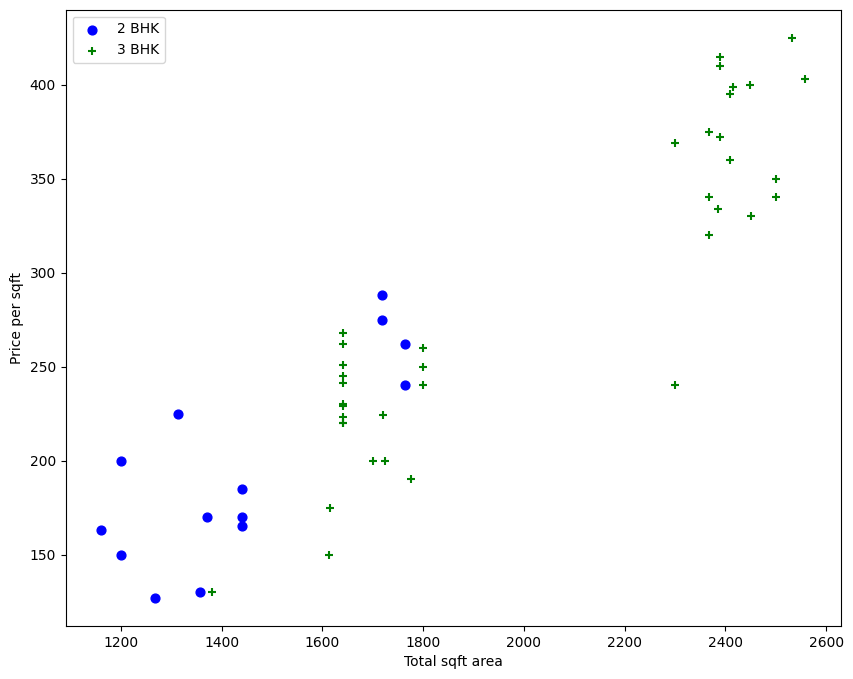

In [54]:
plot_scatter_chart(df_neww, "Rajaji Nagar")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.
```
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [55]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_sq),
                'std' : np.std(bhk_df.price_sq),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_sq<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [56]:
df_1 = remove_bhk_outliers(df_neww)

In [57]:
df_1.shape

(7329, 7)

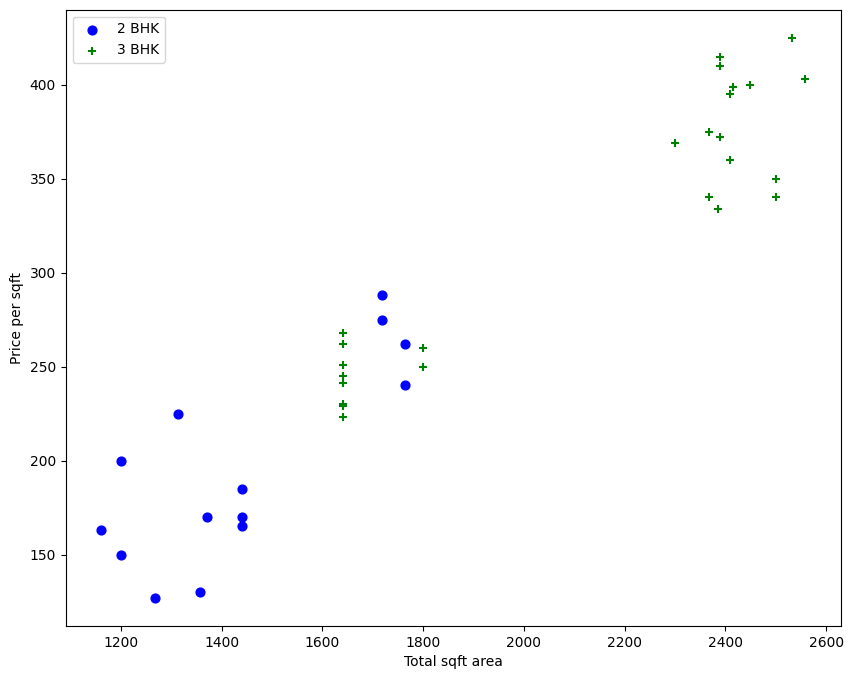

In [58]:
plot_scatter_chart(df_1,"Rajaji Nagar")

Histogram to observe number of properties per sqft

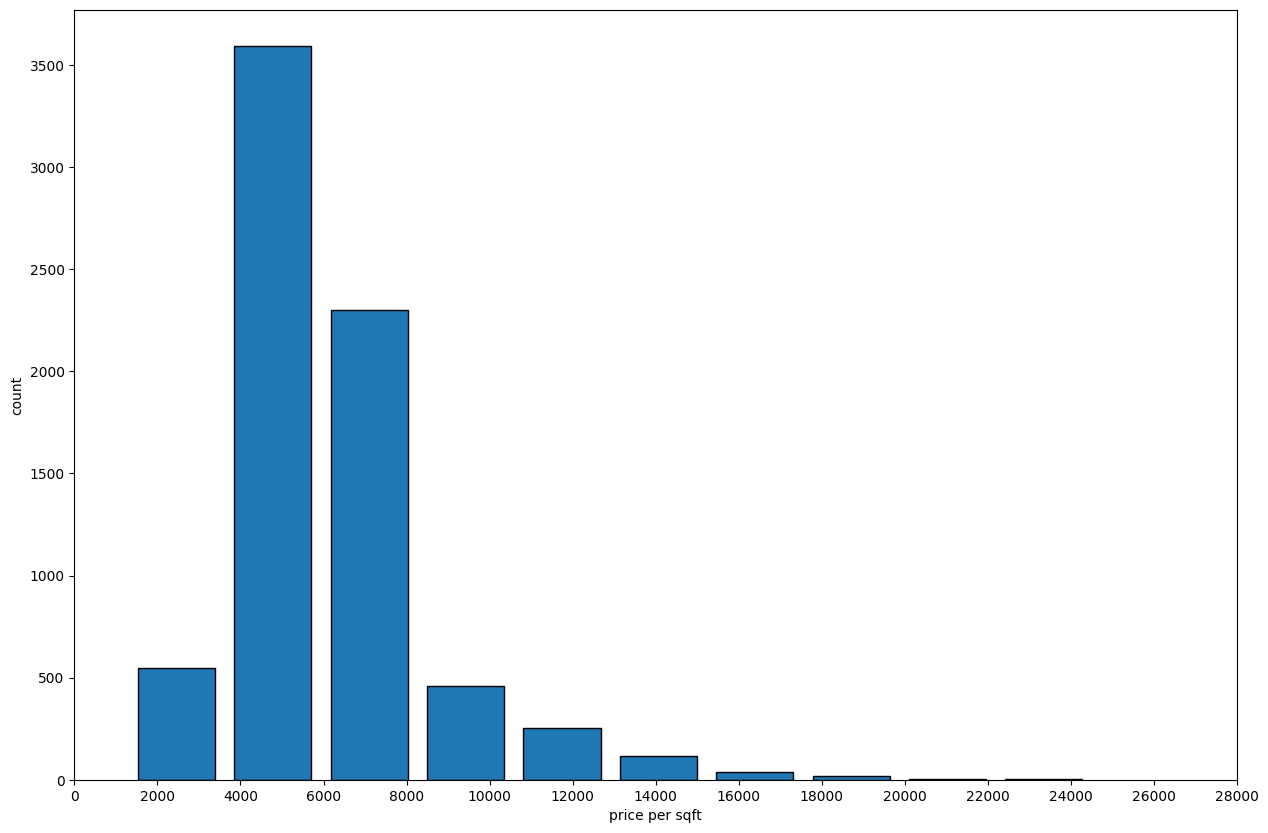

In [59]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,10)

x = np.arange(0,30000,2000)

plt.hist(df_1.price_sq, rwidth = 0.8, edgecolor='black')
plt.xticks(x)
plt.xlabel("price per sqft")
plt.ylabel("count")
plt.show()

In [60]:
df_1.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [61]:
df_1[df_1.bath>10]

,location,size,total_sqft,bath,price,bhk,price_sq
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


remove those data points having number of bathrooms greater than the number of beds + 2, as outliers

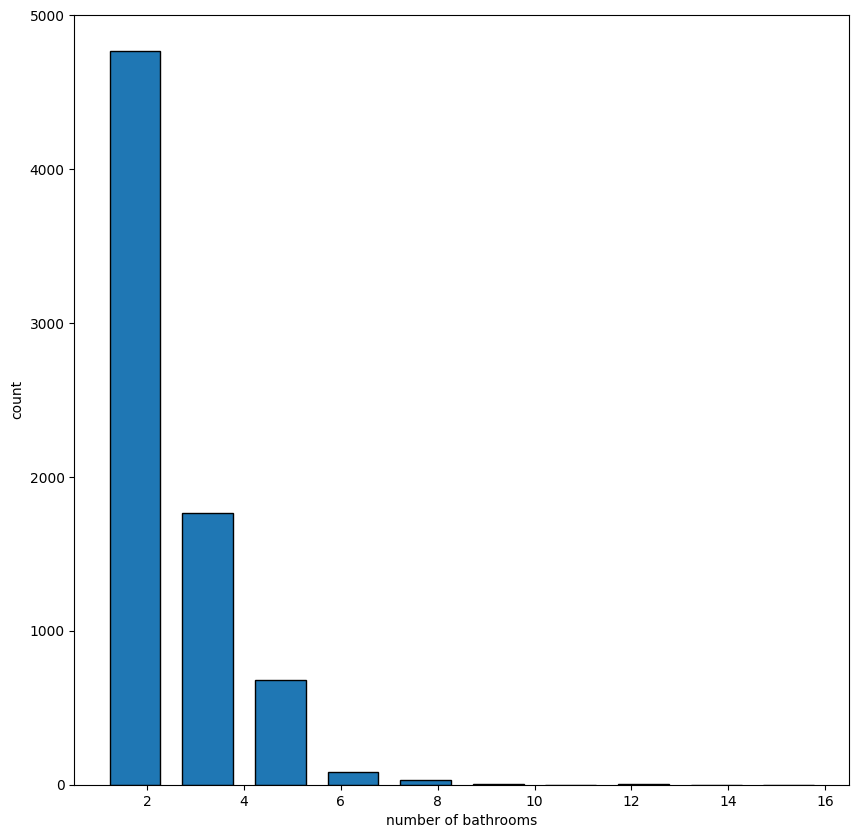

In [62]:
matplotlib.rcParams["figure.figsize"]=(10,10)
plt.hist(df_1.bath, rwidth=0.7, edgecolor='black')
plt.xlabel("number of bathrooms")
plt.ylabel("count")
plt.show()

In [63]:
df_1[df_1.bath>df_1.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_sq
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [64]:
df_2 = df_1[df_1.bath<df_1.bhk+2] #e3
df_2.shape

(7251, 7)

since for size column, we have bhk feature therefore, it can be dropped. We can also drop  price_sq beacuse we used it only for outlier detection

In [65]:
df_3 = df_2.drop(['price_sq', 'size'],axis='columns')
df_3.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


Model Building

##### K-fold cross validation and grid search cv for best also and parameters

##### K-fold cross validation for evaluating performance and Grid Search CV for finding best hyperparameters

One Hot Encoding for Location

In [66]:
dummies = pd.get_dummies(df_3.location, dtype=int) #one hot encoding
dummies.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### we can work without one column and still make the model work

In [67]:
df_4 = pd.concat([df_3, dummies.drop('other', axis='columns')],axis='columns')
df_4 = df_4.drop('location', axis='columns')
df_4.head(5)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df_4.shape

(7251, 245)

In [69]:
X = df_4.drop('price', axis='columns')
X.head(5)

#dropping dependent variable

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
Y = df_4.price
Y.head(5)

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=10)

In [72]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

0.8452277697874357

In [73]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cvv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cvv)


array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286,
       0.77463657, 0.84724578, 0.84813854, 0.84493306, 0.85893313])

In [74]:
# Importing necessary modules from scikit-learn
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# Defining a function to find the best model using GridSearchCV
def find_best_model_using_gridsearchcv(X, Y):
    
    # Dictionary of algorithms to be tested with their respective hyperparameters
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'positive': [True, False],  # Hyperparameter 'normalize' can take values True or False
                'fit_intercept': [True, False],
                'copy_X': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],  # Hyperparameter 'alpha' can take values 1 or 2
                'selection': ['random', 'cyclic']  # Hyperparameter 'selection' can take values 'random' or 'cyclic'
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],  # Hyperparameter 'criterion' can take values 'mse' or 'friedman_mse'
                'splitter': ['best', 'random'],  # Hyperparameter 'splitter' can take values 'best' or 'random'
                'max_features': ['auto', 'sqrt', 'log2', 'None']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


Linear Regression:

model: The LinearRegression class from scikit-learn, representing the linear regression model.
params: A dictionary of hyperparameters for the linear regression model, with only one hyperparameter:
normalize: A boolean hyperparameter indicating whether to normalize the input data. It can take the values True or False.
Lasso Regression:

model: The Lasso class from scikit-learn, representing the Lasso regression model.
params: A dictionary of hyperparameters for the Lasso regression model, with two hyperparameters:
alpha: A regularization parameter that controls the strength of regularization in the Lasso model. It can take the values 1 or 2.
selection: A string hyperparameter that determines the method used to select features when fitting the model. It can take the values 'random' or 'cyclic'.
Decision Tree Regression:

model: The DecisionTreeRegressor class from scikit-learn, representing the decision tree regression model.
params: A dictionary of hyperparameters for the decision tree regression model, with two hyperparameters:
criterion: The function to measure the quality of a split. It can take the values 'mse' (Mean Squared Error) or 'friedman_mse' (Friedman Mean Squared Error).
splitter: The strategy used to choose the split at each node. It can take the values 'best' or 'random'.

In [75]:
find_best_model_using_gridsearchcv(X,Y)

d:\AI and ML\DS1\.venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
d:\AI and ML\DS1\.venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
d:\AI and ML\DS1\.venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
d:\AI and ML\DS1\.venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
d:\AI and ML\DS1\.venv\L

,model,best_score,best_params
0,linear_regression,0.826867,"{'copy_X': True, 'fit_intercept': False, 'posi..."
1,lasso,0.694426,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.706980,"{'criterion': 'friedman_mse', 'max_features': ..."


In [76]:
def predict_price(location, sqft, bath, bhk):
    # Find the index of the 'location' feature in the columns of the input data (X)
    loc_index = np.where(X.columns == location)[0][0]

    # Create an array 'x' with zeros, having the same length as the number of columns in the input data (X)
    x = np.zeros(len(X.columns))
    
    # Set the values of the 'sqft', 'bath', and 'bhk' features in the array 'x'
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    # If the 'location' exists in the columns of the input data (X)
    if loc_index >= 0:
        # Set the value of 'location' to 1 in the array 'x', indicating that the property is located in the given location
        x[loc_index] = 1

    # Predict the price using the trained linear regression model (lr) and the input array 'x'
    return lr.predict([x])[0]


In [77]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [78]:
np.where(X.columns == '6th Phase JP Nagar')[0][0]

9

In [79]:
predict_price('1st Phase JP Nagar',1000, 2, 2)
# output is in lakhs

d:\AI and ML\DS1\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677198772

In [80]:
predict_price('Indira Nagar',1000, 3, 2)

d:\AI and ML\DS1\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


186.3571797845729

In [81]:
predict_price('Indira Nagar',1000, 2, 3)

d:\AI and ML\DS1\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


179.50527707582458

In [82]:
predict_price('delhi',1000, 3, 3) #delhi isn't present in the location

IndexError: index 0 is out of bounds for axis 0 with size 0

Export the tested model to a pickle file

In [ ]:
import pickle
with open('banglore_home_prices_model2.pickle','wb') as f:
    pickle.dump(lr,f)

Export location and column information to a file that will be useful later on in our prediction application

In [ ]:
# Import the json module, which provides functions for working with JSON data.
import json

# 'X' is assumed to be a DataFrame with columns representing the input features of the data.
# The DataFrame columns need to be saved in a JSON file for later reference.

# Create a dictionary 'columns' with a single key 'data_columns' containing the list of column names from DataFrame 'X'.
# The column names are converted to lowercase using a list comprehension.
columns = {
    'data_columns': [col.lower() for col in X.columns]
}

# Use the 'with' statement to open a file in write mode ('w').
# The file named 'columns.json' will be created in the current working directory.
# Note: If the file already exists, it will be overwritten.
with open("columns.json", "w") as f:
    # Use the 'json.dumps()' function to convert the 'columns' dictionary into a JSON-formatted string.
    # The 'json.dumps()' function takes the dictionary as input and returns a JSON string.
    # The JSON string is then written into the file object 'f'.
    f.write(json.dumps(columns))


In [83]:
from xgboost import XGBRegressor

In [84]:
xgbr = XGBRegressor(verbosity=0, objective ='reg:linear', eta=0.675, max_depth=5)
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.675, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)


In [85]:
xgbr.fit(X_train, Y_train)
score = xgbr.score(X_train, Y_train)
print(f"Training score: {score}")

Training score: 0.956352985893247


In [86]:
score2 = xgbr.score(X_test, Y_test)
print(f"Testing Score: {score2}")

Testing Score: 0.8540080197570351


In [87]:
cv_score = cross_val_score(xgbr, X_train, Y_train, cv=10, error_score=0.0,)
print(f"Cross Validation: {cv_score.mean()}")

Cross Validation: 0.8359096442500569


In [88]:
from sklearn.metrics import mean_squared_error

In [89]:
y_pred_xgb = xgbr.predict(X_test)
mse = mean_squared_error(Y_test, y_pred_xgb)
print(f"MSE: {mse}")
print(f"RMSE {mse*(1/2.0)}")

MSE: 738.8312056667892
RMSE 369.4156028333946


In [ ]:
# from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

# hyperparameter_space = {
#     'n_estimators': hp.choice('n_estimators', range(50, 500)),
#     'max_depth': hp.choice('max_depth', range(1, 10)),
#     'learning_rate': hp.loguniform('learning_rate', -2, 0),
#     'subsample': hp.uniform('subsample', 0.5, 1),
#     'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
# }

# # Define the objective function to minimize (Negative Mean Squared Error)
# def objective(params):
#     model = XGBRegressor(**params, random_state=42)
#     model.fit(X_train, Y_train)
#     y_pred = model.predict(X_test)
#     mse = np.mean((y_pred - Y_test) ** 2)
#     return {'loss': mse, 'status': STATUS_OK}

# # Initialize the trials object
# trials = Trials()

# # Perform hyperparameter tuning using Hyperopt
# best = fmin(fn=objective, space=hyperparameter_space, algo=tpe.suggest, max_evals=100, trials=trials)

# print("Best hyperparameters:")
# print(best)


In [ ]:
# xgbr2 = XGBRegressor(colsample_bytree= 0.8279486488867988, learning_rate= 0.40702592223485, max_depth= 4, n_estimators= 214, subsample= 0.9892985013556768)
# print(xgbr2)
# xgbr2.fit(X_train, Y_train)
# score = xgbr2.score(X_train, Y_train)
# print(f"Training score: {score}")
# score2 = xgbr2.score(X_test, Y_test)
# print(f"Testing Score: {score2}")
# cv_score = cross_val_score(xgbr2, X_train, Y_train, cv=10, error_score=0.0,)
# print(f"Cross Validation: {cv_score.mean()}")